<a href="https://colab.research.google.com/github/samuel23taku/NoteBooks/blob/main/DiffusionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

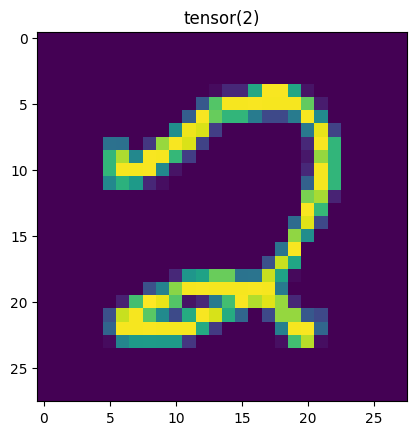

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
from torchvision.transforms import  ToTensor, Normalize
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

# Other code
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

testing_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

train_dataloader = DataLoader(
    training_data, batch_size = 1000,shuffle=True
)
test_dataloader = DataLoader(
    testing_data, batch_size = 1000,shuffle=True
)


train_features,train_labels = next(iter(train_dataloader))
eg_image = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(eg_image)
plt.title(label)
plt.show()

In [18]:
## Diffusion Process

In [20]:
class DiffusionU_NET(nn.Module):
  def __init__(self,in_channels,out_channels):
    super(DiffusionU_NET,self).__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(in_channels=in_channels,out_channels=64,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2)
        )

    self.bottleneck = nn.Sequential(
        nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
    )

    self.decoder = nn.Sequential(
        nn.Conv2d(in_channels=256,out_channels=128,kernel_size=2,stride=2),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=128,out_channels=64,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=64,out_channels=out_channels,kernel_size=1),
        )

  def forward(self,x):
    encoder_def = self.encoder(x)
    bottleneck = self.bottleneck(encoder_def)
    decoder_def = self.decoder(bottleneck)
    return decoder_def
